In [1]:
# IML - Project 2 - Q2.f
# (Antoine Debor & Jan Held, November 2020)

# Run the entire notebook to obtain the figures presented in the report

from sklearn.linear_model import Ridge
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
np.random.seed(0)


def f(x):
    """ function to approximate """
    return -x**3+3*x**2-2*x+1

def generationOfLS(mu_e, sigma_e):
    """Generation of the LS by using the formula
       y = f(x) + mu_e where mu_e ∼ N (0, sigma_e^2)

    Return
    ------
    LS
    """
    
    LS = []
    for j in np.arange(nb_LS):
        LS_j = []
        for k in range(LS_size):
            x = random.uniform(0, 2)
            LS_j.append((f(x)+ np.random.normal(mu_e, sigma_e),x))
        LS.append(LS_j)
    return LS

nb_x = 200
nb_lam = 200
nb_LS = 1000
LS_size = 30
mu_e, sigma_e = 0, np.sqrt(0.1)
x_0 = np.arange(0,2,2/nb_x)
lam = np.arange(0,2,2/nb_lam)
fun = f(x_0)

# Generation of the LS
LS = generationOfLS(mu_e, sigma_e)

unit_vect = np.ones(LS_size)
unit_vect_bis = np.ones(nb_x)

In [2]:
sqBias_ridge = []
var_ridge = []
expErr_ridge = []

# Creation of multiple models with a different lambda where lambda ∈ [0.0, 2.0]
for lmda in lam:
    models = []
    for LS_j in LS:
        LS_j = np.asarray(LS_j)
        X = np.stack((unit_vect, LS_j[:,1] , LS_j[:,1]**2, LS_j[:,1]**3, LS_j[:,1]**4, LS_j[:,1]**5), axis=1)
        model = Ridge(alpha=lmda, fit_intercept=False).fit(X,y=LS_j[:,0])
        models.append(model)
    
    y_hat = np.zeros((nb_x,1))
    arg = np.zeros((nb_x,1))
    
    # Computation of the squared bias for the different models
    for model in models:       
        y_hat = y_hat + (model.predict(np.stack((unit_vect_bis, x_0, x_0**2, x_0**3, x_0**4, x_0**5), axis=1))).reshape((nb_x,1))

    y_hat_avg = y_hat/nb_LS
    bias_squared = fun-y_hat_avg.transpose()
    bias_squared = (bias_squared.reshape(np.size(bias_squared)))**2
    sqBias_ridge.append(np.mean(bias_squared))
    
    #Computation of the variance for the different models
    for model in models:
        arg = arg + (model.predict(np.stack((unit_vect_bis, x_0, x_0**2, x_0**3, x_0**4, x_0**5), axis=1)).reshape((nb_x,1)) - y_hat_avg)**2
    
    var = arg/nb_LS
    var_ridge.append(np.mean(var))
    
    # Computation of the expected error
    exp_err = sigma_e**2 + bias_squared + var.reshape(nb_x)
    expErr_ridge.append(np.mean(exp_err))
    


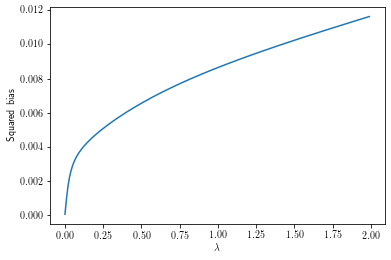

In [3]:
#Mean estimated squared bias
plt.plot(lam, sqBias_ridge)
plt.xlabel("$\lambda$")
plt.ylabel("Squared bias")
plt.show()

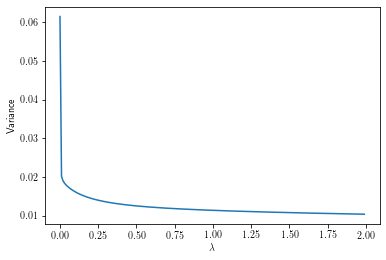

In [4]:
#Mean estimated variance
plt.plot(lam, var_ridge)
plt.xlabel("$\lambda$")
plt.ylabel("Variance")
plt.show()

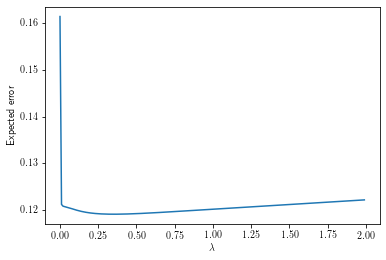

In [5]:
#Mean estimated exoected error
plt.plot(lam, expErr_ridge)
plt.xlabel("$\lambda$")
plt.ylabel("Expected error")
plt.show()